In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

df = pd.read_csv('/content/drive/MyDrive/Dataset/Supply_Chain_Dataset_New.csv', encoding='latin1', engine='python')

#drop unwanted columns
unwanted_columns =["Category Id","Customer Email","Customer Zipcode","Customer Street","Customer Fname","Customer Id","Customer Lname","Customer Segment","Latitude","Longitude","Order Customer Id","order date (DateOrders)","Order Id","Order Item Cardprod Id","Order Item Id","Order Zipcode","Product Card Id","Product Category Id","Product Status","shipping date (DateOrders)"]
df.drop(unwanted_columns, axis=1, inplace=True)

# change object data into int or float

hist_data = df.copy(deep=False)

from sklearn.preprocessing import LabelEncoder
def Change_obj_type(data):
    for column in data.columns:
        if df[column].dtype == type(object):
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
    return df
new_data = Change_obj_type(hist_data)
new_data.info()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country       

1)Features: 2 highest pc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

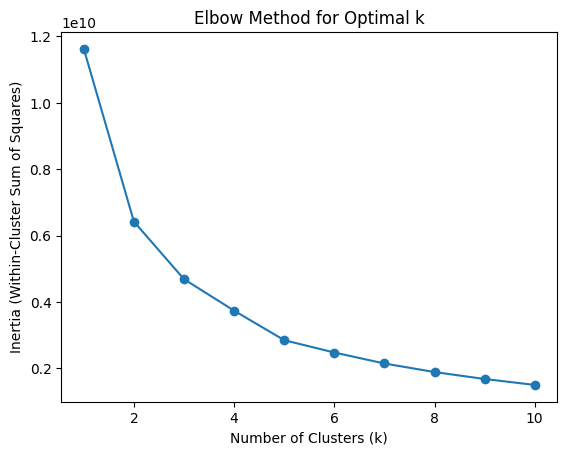

Optimal Number of Clusters (k): 10


In [ ]:
from sklearn.cluster import KMeans

# Assuming your dataset has numerical features you want to use for clustering
X = new_data[['Benefit per order','Sales per customer','Delivery Status','Late_delivery_risk','Order Item Discount','Order Item Profit Ratio','Order Item Quantity','Sales','Product Name','Product Price']]  # Adjust features based on your dataset

# Calculate inertia for different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Find the optimal number of clusters (k)
optimal_k = inertia.index(min(inertia)) + 1
print(f'Optimal Number of Clusters (k): {optimal_k}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


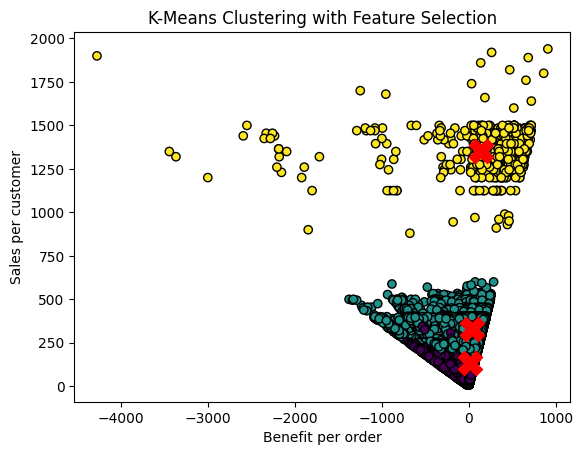

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Get the names of the features before applying VarianceThreshold
feature_names = X.columns

# Apply VarianceThreshold to select features with non-zero variance
selector = VarianceThreshold()
X_selected = selector.fit_transform(X)

# Get the names of the selected features
selected_feature_names = feature_names[selector.get_support()]

kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the k-means model to the selected features
kmeans.fit(X_selected)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('K-Means Clustering with Feature Selection')
plt.xlabel(f'{selected_feature_names[0]}')
plt.ylabel(f'{selected_feature_names[1]}')
plt.show()

2)Features:Sales and Order Item Profit Ratio

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


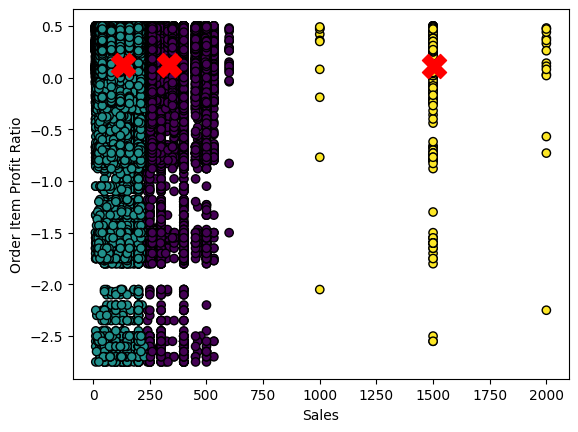

In [ ]:
from sklearn.cluster import KMeans

# Assuming your dataset has numerical features you want to use for clustering
X = new_data[['Sales','Order Item Profit Ratio']]# Adjust features based on your dataset
#,','Order Item Profit Ratio','Sales','Product Name','Product Price'
from sklearn.feature_selection import VarianceThreshold

# Get the names of the features before applying VarianceThreshold
feature_names = X.columns

# Apply VarianceThreshold to select features with non-zero variance
selector = VarianceThreshold()
X_selected = selector.fit_transform(X)

# Get the names of the selected features
selected_feature_names = feature_names[selector.get_support()]

kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the k-means model to the selected features
kmeans.fit(X_selected)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.xlabel(f'{selected_feature_names[0]}')
plt.ylabel(f'{selected_feature_names[1]}')
plt.show()